In [30]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

In [31]:
filename = "checkers.mp4"
vid = imageio.get_reader(filename, "ffmpeg")
# Positions contain frames of video that have distinct positions.
positions = [0, 100, 225, 350]

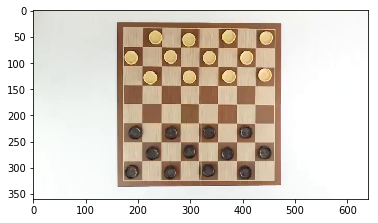

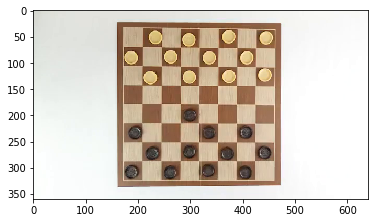

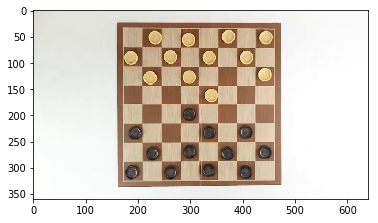

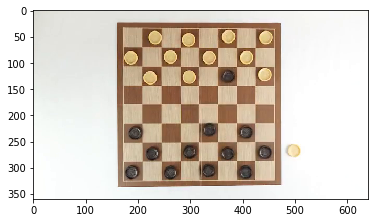

In [32]:
for position in positions:
    fig = plt.figure()
    plt.imshow(vid.get_data(position))
plt.show()

In [33]:
img = vid.get_data(positions[3])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findChessboardCorners(img, (7, 7), None)
found, corners

(False, None)

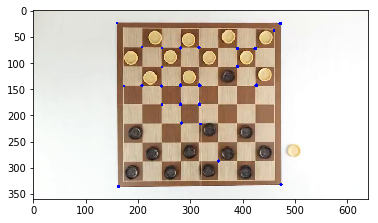

In [34]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,(0,0,255),-1)

plt.imshow(img)


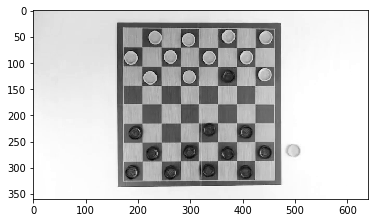

In [35]:
plt.imshow(gray, cmap="gray")

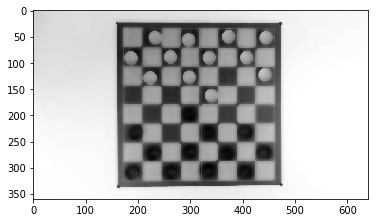

In [36]:
plt.imshow(blurred, cmap="gray")